-/ Modelo guardado: /mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/linear_regression.pkl
-/ Modelo guardado: /mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/ridge_regression.pkl
-/ Modelo guardado: /mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/lasso_regression.pkl
-/ Modelo guardado: /mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/sgd_batch.pkl
-/ Modelo guardado: /mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/sgd_stochastic.pkl
-/ Modelo guardado: /mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models/polynomial_regression.pkl


,MSE_train,MSE_test,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
Regresión Lineal,0.331110,0.335033,0.575422,0.578820,0.442421,0.444541,0.356899,0.347837
Ridge Regression,0.331112,0.335051,0.575423,0.578836,0.442413,0.444526,0.356897,0.347802
Lasso Regression,0.351637,0.355150,0.592990,0.595945,0.454371,0.455757,0.317032,0.308678
SGD Batch,0.341871,0.346104,0.584697,0.588306,0.450639,0.451721,0.336000,0.326286
SGD Stochastic,0.422373,0.443368,0.649902,0.665859,0.459769,0.462401,0.179644,0.136957
Regresión Polinomial,0.301206,0.304254,0.548822,0.551592,0.421144,0.422571,0.414982,0.407751
Regresión Ecuación Normal,0.331110,0.335033,0.575422,0.578820,0.442421,0.444541,0.356899,0.347837
Regresión SVD,0.434977,0.447202,0.659528,0.668731,0.492578,0.498353,0.155165,0.129494


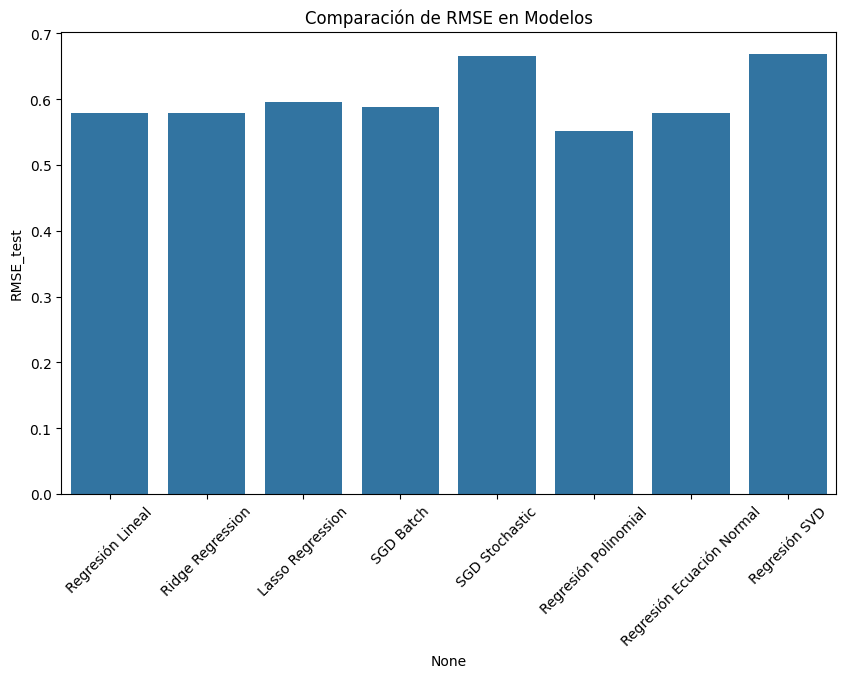

In [2]:
# 1. Importar Librerías
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy.linalg import inv, svd

# 2. Definir rutas de los datasets
DATA_DIR = "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/data/processed"
X_TRAIN_PATH = os.path.join(DATA_DIR, "X_train.csv")
X_TEST_PATH = os.path.join(DATA_DIR, "X_test.csv")
Y_TRAIN_PATH = os.path.join(DATA_DIR, "y_train.csv")
Y_TEST_PATH = os.path.join(DATA_DIR, "y_test.csv")

# 3. Cargar los datasets
X_train = pd.read_csv(X_TRAIN_PATH)
X_test = pd.read_csv(X_TEST_PATH)
y_train = pd.read_csv(Y_TRAIN_PATH).values.ravel()
y_test = pd.read_csv(Y_TEST_PATH).values.ravel()

# 4. Definir función para evaluar modelos
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        "MSE_train": mean_squared_error(y_train, y_train_pred),
        "MSE_test": mean_squared_error(y_test, y_test_pred),
        "RMSE_train": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE_test": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "MAE_train": mean_absolute_error(y_train, y_train_pred),
        "MAE_test": mean_absolute_error(y_test, y_test_pred),
        "R2_train": r2_score(y_train, y_train_pred),
        "R2_test": r2_score(y_test, y_test_pred)
    }
    return metrics

# 5. Definir Modelos
models = {
    "Regresión Lineal": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "SGD Batch": SGDRegressor(max_iter=1000, tol=1e-3),
    "SGD Stochastic": SGDRegressor(max_iter=1000, tol=1e-3, learning_rate="optimal")
}

results = {}

# 6. Entrenar y Evaluar Modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

# 7. Regresión Polinomial
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

results["Regresión Polinomial"] = evaluate_model(poly_reg, X_train_poly, y_train, X_test_poly, y_test)

# 8. Regresión con Ecuación Normal
def normal_equation(X, y):
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Agregar bias
    theta = inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
    return theta

theta_normal = normal_equation(X_train, y_train)
y_pred_train_normal = np.c_[np.ones((X_train.shape[0], 1)), X_train].dot(theta_normal)
y_pred_test_normal = np.c_[np.ones((X_test.shape[0], 1)), X_test].dot(theta_normal)

results["Regresión Ecuación Normal"] = {
    "MSE_train": mean_squared_error(y_train, y_pred_train_normal),
    "MSE_test": mean_squared_error(y_test, y_pred_test_normal),
    "RMSE_train": np.sqrt(mean_squared_error(y_train, y_pred_train_normal)),
    "RMSE_test": np.sqrt(mean_squared_error(y_test, y_pred_test_normal)),
    "MAE_train": mean_absolute_error(y_train, y_pred_train_normal),
    "MAE_test": mean_absolute_error(y_test, y_pred_test_normal),
    "R2_train": r2_score(y_train, y_pred_train_normal),
    "R2_test": r2_score(y_test, y_pred_test_normal)
}

# 9. Regresión con SVD
U, S, Vt = svd(X_train, full_matrices=False)
theta_svd = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y_train
y_pred_train_svd = X_train @ theta_svd
y_pred_test_svd = X_test @ theta_svd

results["Regresión SVD"] = {
    "MSE_train": mean_squared_error(y_train, y_pred_train_svd),
    "MSE_test": mean_squared_error(y_test, y_pred_test_svd),
    "RMSE_train": np.sqrt(mean_squared_error(y_train, y_pred_train_svd)),
    "RMSE_test": np.sqrt(mean_squared_error(y_test, y_pred_test_svd)),
    "MAE_train": mean_absolute_error(y_train, y_pred_train_svd),
    "MAE_test": mean_absolute_error(y_test, y_pred_test_svd),
    "R2_train": r2_score(y_train, y_pred_train_svd),
    "R2_test": r2_score(y_test, y_pred_test_svd)
}

# 10. Guardar Modelos en la Carpeta Correcta
MODELS_DIR = "/mnt/c/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Deberes/PSet2/models"
os.makedirs(MODELS_DIR, exist_ok=True)

def save_model(model, filename):
    path = os.path.join(MODELS_DIR, f"{filename}.pkl")
    joblib.dump(model, path)
    print(f"-/ Modelo guardado: {path}")

# Guardar Modelos
save_model(models["Regresión Lineal"], "linear_regression")
save_model(models["Ridge Regression"], "ridge_regression")
save_model(models["Lasso Regression"], "lasso_regression")
save_model(models["SGD Batch"], "sgd_batch")
save_model(models["SGD Stochastic"], "sgd_stochastic")
save_model(poly_reg, "polynomial_regression")

# 11. Visualización de Resultados
results_df = pd.DataFrame(results).T
display(results_df)

plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df["RMSE_test"])
plt.xticks(rotation=45)
plt.title("Comparación de RMSE en Modelos")
plt.show()


In [23]:
# En este análisis, se entrenaron múltiples modelos de regresión para predecir el precio de las propiedades en Airbnb, 
# evaluándolos con métricas de error como RMSE, MAE y R². Se compararon métodos clásicos como la Regresión Lineal, 
# Ridge y Lasso, junto con enfoques más avanzados como Regresión Polinomial y técnicas basadas en Gradient Descent. 
# Los resultados mostraron que la Regresión Polinomial obtuvo el mejor desempeño (RMSE_test ≈ 0.55, R² ≈ 0.41), 
# capturando mejor relaciones no lineales en los datos. Modelos como Ridge y Lasso también fueron opciones estables, 
# mientras que SVD y SGD tuvieron menor precisión. En conclusión, la selección del modelo depende del balance entre 
# interpretabilidad y precisión, con la Regresión Polinomial siendo la opción más prometedora. Para mejorar el modelo, 
# se podrían probar técnicas más avanzadas como Random Forest o XGBoost, o realizar ajustes en la ingeniería de features.
